In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Client 3: SportsStats (Olympics Dataset - 120 years of data)
## SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights 
## to help their partners.
## Insights could be patterns/trends highlighting certain groups/events/countries, etc. 
## for the purpose of developing a news story or discovering key health insights.

In [3]:
## Step 1: Preparing for Your Proposal

## You will document your preparation in developing the project proposal. This includes:

##    Which client/dataset did you select and why?

##    Describe the steps you took to import and clean the data.

##    Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at.

##    Create an ERD or proposed ERD to show the relationships of the data you are exploring. 



In [4]:
# #### Step 1 (Answers)

# <!-- Which client/dataset did you select and why? -->

# Olympic Dataset, because I have an inclination in sports and would like to make a career out of it. Using this dataset I can create a great project that can shine in my resume and plus sports is a field which I really like

# <!-- Describe the steps you took to import and clean the data. -->

# I used Pandas library for reading the data, which is in csv file. To clean the data, first I removed the null values and merge the two dataframe based on the NOC columns.

# <!-- Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at. -->

# df.describe()
# df.info()
# merge two df_events and df_regions

# <!-- Create an ERD or proposed ERD to show the relationships of the data you are exploring.  -->

In [5]:
df_athlete_events = pd.read_csv("data/athlete_events.csv")
df_noc_regions = pd.read_csv("data/noc_regions.csv")

In [6]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df_noc_regions.head() # NOC :  National Olympic Committee (3-letter code)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Data Cleaning

In [8]:
# data integration
df_final = pd.merge(df_athlete_events,df_noc_regions,'inner',on='NOC')
df_final.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [9]:
# Null values

df_final.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

In [10]:
# Handling region null values, using NOC values

In [11]:
# medal unknown values, replace it with 0 or didn't win

df_final['Medal'] = df_final['Medal'].fillna(0)
df_final['Medal'].isnull().sum()

0

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   270767 non-null  object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.1+ MB


In [13]:
df_final.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [14]:
df_final.duplicated().sum()

1385

In [15]:
df_final.drop_duplicates(inplace=True)
df_final.duplicated().sum()

0

### Initial Exploration

In [16]:
info = [df_final['Season'].unique(),
        df_final['Team'].unique(),
        df_final['Sport'].unique(),
        df_final['Event'].unique(),
        df_final['region'].unique(),
        df_final['Medal'].unique()]

for i in info:
    print(i,len(i),sep=" | ")
    print("---------------")
    print()

['Summer' 'Winter'] | 2
---------------

['China' 'China-2' 'China-1' ... 'Kosovo' 'South Sudan' 'Lesotho'] | 1179
---------------

['Basketball' 'Judo' 'Boxing' 'Wrestling' 'Swimming' 'Speed Skating'
 'Short Track Speed Skating' 'Softball' 'Hockey' 'Curling' 'Archery'
 'Triathlon' 'Football' 'Rhythmic Gymnastics' 'Athletics' 'Badminton'
 'Fencing' 'Figure Skating' 'Gymnastics' 'Volleyball' 'Baseball'
 'Water Polo' 'Snowboarding' 'Shooting' 'Weightlifting' 'Cycling' 'Rowing'
 'Sailing' 'Diving' 'Modern Pentathlon' 'Art Competitions'
 'Synchronized Swimming' 'Handball' 'Canoeing' 'Cross Country Skiing'
 'Table Tennis' 'Ice Hockey' 'Tennis' 'Taekwondo' 'Freestyle Skiing'
 'Beach Volleyball' 'Trampolining' 'Alpine Skiing' 'Golf' 'Biathlon'
 'Equestrianism' 'Ski Jumping' 'Tug-Of-War' 'Bobsleigh' 'Nordic Combined'
 'Polo' 'Skeleton' 'Rugby Sevens' 'Luge' 'Roque' 'Rugby' 'Lacrosse'
 'Jeu De Paume' 'Military Ski Patrol' 'Cricket' 'Croquet' 'Motorboating'
 'Basque Pelota' 'Alpinism' 'Aeronauti

In [17]:
# which region has highest Gold Medal | region-wise distribution of Medals

# df_medal = df_final.groupby(['region','Medal'], as_index=False)['Medal'].count()
# print(df_medal.sort_values(['Medal'], ascending=False).head(20))

df_final.groupby(['region','Medal'])['Medal'].count().sort_values(ascending = False).to_frame(name ='Medal Count').reset_index()

,region,Medal,Medal Count
0,USA,0,12967
1,Germany,0,12031
2,France,0,10784
3,UK,0,10048
4,Italy,0,9031
...,...,...,...
527,Costa Rica,Silver,1
528,Haiti,Gold,1
529,Curacao,Silver,1
530,Panama,Gold,1


In [18]:
# gender distribution

df_final.groupby(['Sex'])['ID'].count().sort_values(ascending = False).to_frame(name ='Population').reset_index()

,Sex,Population
0,M,195133
1,F,74249


In [19]:
# initial explorations | some of the stats you are looking at

df_final[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,260079.000000,210656.000000,207945.000000
mean,25.457542,175.344234,70.708909
std,6.162508,10.519601,14.351103
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [20]:
## ERD

from pandaserd import ERD

In [21]:
erd = ERD()
t1 = erd.add_table(df_athlete_events, 'NOC', bg_color='pink')
t2 = erd.add_table(df_noc_regions, 'NOC', bg_color='skyblue')
erd.create_rel('athelete_events', 'noc_regions', on='athelete_events', right_cardinality='*')
erd.create_rel('athelete_events', 'noc_regions', left_on='NOC', right_on='NOC', left_cardinality='+', right_cardinality='+')

erd.write_to_file('output.txt')

 table athelete_events not found, create one with add_table method
 table athelete_events not found, create one with add_table method
written to output.txt; visit https://edotor.net/ to render ERD


### Step - 2

In [22]:
## Step 2: Develop Project Proposal | In this step, you will need to include the following:

## 1. Description
## Write a 5-6 sentence paragraph describing your project; include who might be interested to learn about your findings. Who might be your audience?



## 2. Questions
## Create 2-3 questions that you want to answer with the data:



## 3. Hypothesis
## What are your initial hypotheses about the data?
## Write 2-3 assumptions about the data that you'll want to go back to prove or disprove. You will want to keep them in front of you as you look at the data to keep them or change them. You may see relationships that you want to explore and will develop a "belief" about the data.  
##    Start documenting what you think you can tell from the data. 
##    What pops up as interesting to you? Most likely it will be interesting to others as well.
##    Use the discussion boards to discuss with others about your client and the data to brainstorm together.


## 4. Approach
## Describe in 5-6 sentences what approach you are going to take in order to prove (or disprove) your hypotheses. Think about the following in your answer:  
##    What features (fields/columns) are you going to look at first?
##    Is there a relationship that exists that you want to explore?
##    What metric/ evaluation measure will you use?

In [23]:
### Step - 2 (Answers)


# <!-- Description | Write a 5-6 sentence paragraph describing your project; include who might be interested to learn about your findings. Who might be your audience?-->

# This project is an analysis of Olympics dataset, here we try to analyze performance of athletes, which countries are dominating in olympics,
# which sports is the strength or weakness of different regions. The target audience is athelets, sports organization of nation, fans, marketing agencies,
# brands which are investing in olympics for their marketing  

In [24]:
# <!-- Questions | Create 2-3 questions that you want to answer with the data -->
# Q-1 Which are the best performing athelets in their sports ?
# Q-2 Analyzing best performing nations, in which sports categories they are dominating, best atheletes belongs to which nations ?
# Q-3 demography (age-distribution) and gender participation, sports-wise gender distribution, nation-wise gender distributions ? 

In [25]:
# <!-- Hypothesis | What are your initial hypotheses about the data? -->

# 1- Gender distribution, participation of Female should have increased over the years
# 2- USA has the highest gold medal count
# 3- 

In [26]:
# <!-- Approach | Describe in 5-6 sentences what approach you are going to take in order to prove (or disprove) your hypotheses -->

# 1- for gender participation analysis over the years, I am going to take the gender column and count their number over the years
# then I will use a graphical representation of the data to see the variation in the data

# 2- to understand the best performing nation I am going to use the nation and count of different medlas they secured over the years, 
# then plot a bar chart for comparison of different nations

### Week 2

    <!-- 
    Provide a summary of the different descriptive statistics you looked at and WHY.

    Submit 2-3 key points you may have discovered about the data, e.g. new relationships? 
    Aha's! Did you come up with additional ideas for other things to review?

    Soln. Different seasons means different sports (this thing didm't strike me earlier),
    Number of athletes in different sports,
    

    Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

    What additional questions are you seeking to answer?
    
    -->

In [27]:
df_final[['Age','Height', 'Weight', 'Year']].describe()

,Age,Height,Weight,Year
count,260079.000000,210656.000000,207945.000000,269382.000000
mean,25.457542,175.344234,70.708909,1978.607123
std,6.162508,10.519601,14.351103,29.759095
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


<Axes: >

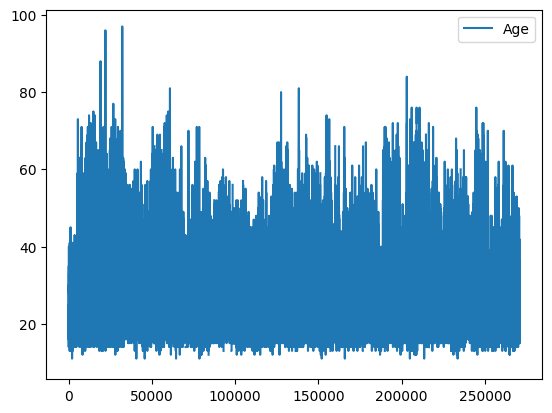

In [28]:
df_final[['Age']].plot()


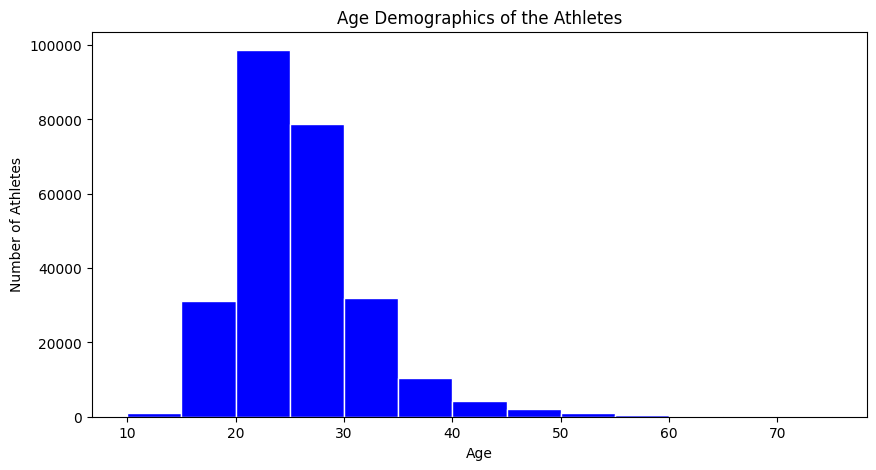

In [29]:
#Age Demographics of the Athletes
plt.figure(figsize=(10, 5))
plt.title("Age Demographics of the Athletes")
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.hist(df_final.Age, bins = np.arange(10,80,5), color='blue', edgecolor='white')
plt.show()


In [32]:
df_final[df_final['Season'] == 'Summer']['Sport'].value_counts()

Sport
Athletics                38596
Gymnastics               26703
Swimming                 23052
Shooting                 11432
Cycling                  10827
Fencing                  10731
Rowing                   10594
Wrestling                 7154
Football                  6745
Sailing                   6510
Equestrianism             6343
Canoeing                  6169
Boxing                    6046
Hockey                    5400
Basketball                4526
Weightlifting             3926
Water Polo                3836
Judo                      3799
Handball                  3665
Volleyball                3404
Tennis                    2862
Diving                    2842
Archery                   2334
Art Competitions          2263
Table Tennis              1915
Modern Pentathlon         1677
Badminton                 1436
Synchronized Swimming      909
Baseball                   894
Rhythmic Gymnastics        658
Taekwondo                  606
Beach Volleyball           564
Tr

In [33]:
df_final[df_final['Season'] == 'Winter']['Sport'].value_counts()

Sport
Cross Country Skiing         9133
Alpine Skiing                8829
Speed Skating                5613
Ice Hockey                   5456
Biathlon                     4893
Bobsleigh                    3058
Ski Jumping                  2401
Figure Skating               2244
Short Track Speed Skating    1534
Luge                         1479
Nordic Combined              1344
Freestyle Skiing              937
Snowboarding                  936
Curling                       463
Skeleton                      199
Military Ski Patrol            24
Alpinism                       21
Name: count, dtype: int64

In [35]:
# Number of athletes in different sports


df_final.groupby(['Sport'])['ID'].count().sort_values(ascending=False)

Sport
Athletics        38596
Gymnastics       26703
Swimming         23052
Shooting         11432
Cycling          10827
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: ID, Length: 66, dtype: int64

In [43]:
# Popular sports - Gender wise

print("******* Male *************")
print(df_final[df_final['Sex'] == 'M'].groupby(['Sport'])['ID'].count().sort_values(ascending=False).head())
print("\n")
print("******* Female *************")
df_final[df_final['Sex'] == 'F'].groupby(['Sport'])['ID'].count().sort_values(ascending=False).head()


"""
irrespective of Gender
Athletics, Gymnastics and Swimming has the highest participation
"""

******* Male *************
Sport
Athletics     26941
Gymnastics    17578
Swimming      13252
Shooting       9716
Cycling        9433
Name: ID, dtype: int64


******* Female *************


Sport
Athletics               11655
Swimming                 9800
Gymnastics               9125
Alpine Skiing            3398
Cross Country Skiing     3385
Name: ID, dtype: int64

<Axes: xlabel='Year'>

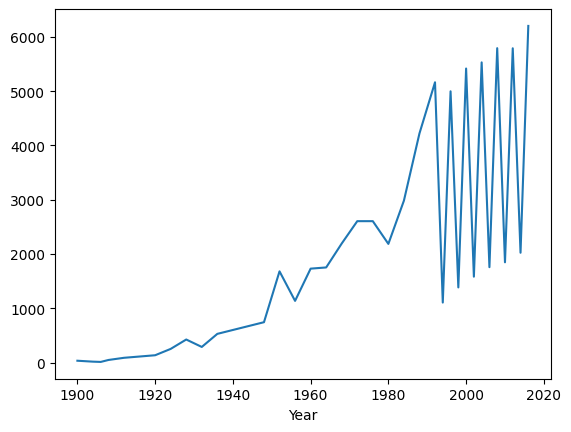

In [46]:
### participation of female over the years


df_final[df_final['Sex'] == 'F'].groupby(['Year'])['ID'].count().plot()

<Axes: xlabel='Year'>

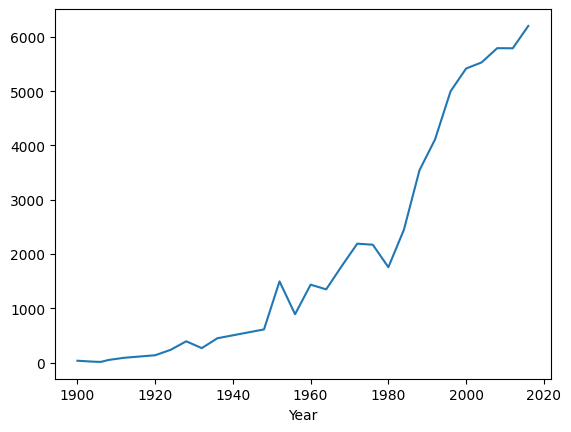

In [57]:
# exclude winter season

df_final[(df_final['Sex'] == 'F') & (df_final['Season'] == 'Summer')].groupby(['Year'])['ID'].count().plot()

<Axes: xlabel='Year'>

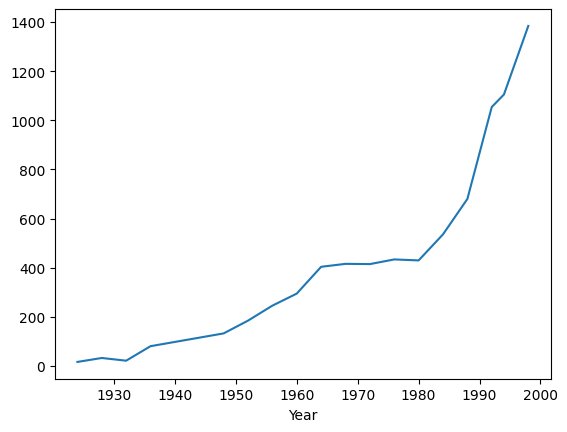

In [60]:
df_final[(df_final['Sex'] == 'F') & (df_final['Season'] == 'Winter') & (df_final['Year'] < 2000)].groupby(['Year'])['ID'].count().plot()